## Finite Elements on Fractals

Construct the Finite Element approximations to the solution to Helmholz's equation $\Delta u=\lambda u$ on the Sierpinski Gasket Fractal. That is, use finite elements to find the eigenvalues and eigenvectors of the fractal Laplacian $\Delta f(x)=\lim_{m\rightarrow \infty} \frac{3}{2}5^m\sum_{y\sim_mx}f(y)-f(x) $

Import packages

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from IPython.display import HTML
from matplotlib import animation

Build three adjacency matrices $A_1, A_2, A_3$ corresponding to graph approximations $m=1,2,3$ of the Sierpinski Gasket $SG$. These are symmetric matrices which store the connections between vertices in the graph approximations to the $SG$

In [ ]:
#@title
# these are the number of vertices for each iteration
n1, n2, n3 = 6, 15, 42

A1 = [[0, 0, 0, 1, 1, 0], \
      [0, 0, 0, 0, 1, 1], \
      [0, 0, 0, 1, 0, 1], \
      [1, 0, 1, 0, 1, 1], \
      [1, 1, 0, 1, 0, 1], \
      [0, 1, 1, 1, 1, 0]]
A1= np.array(A1)

      
A2 = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0], \
      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], \
      [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0], \
      [0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0], \
      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0], \
      [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1], \
      [0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0], \
      [0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0], \
      [0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], \
      [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0], \
      [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0], \
      [0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0], \
      [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1], \
      [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1], \
      [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0]]
A2 = np.array(A2)

A3 = np.zeros((42,42)); 
A3[0, 15]=1; A3[0, 16]=1
A3[1, 28]=1; A3[1, 29]=1
A3[2, 39]=1; A3[2, 41]=1
A3[3, 21]=1; A3[3, 23]=1; A3[3, 33]=1; A3[3, 34]=1
A3[4, 19]=1; A3[4, 20]=1; A3[4, 24]=1; A3[4, 25]=1
A3[5, 30]=1; A3[5, 32]=1; A3[5, 37]=1; A3[5, 38]=1
A3[6, 33]=1; A3[6, 35]=1; A3[6, 39]=1; A3[6, 40]=1
A3[7, 34]=1; A3[7, 35]=1; A3[7, 36]=1; A3[7, 37]=1
A3[8, 36]=1; A3[8, 38]=1; A3[8, 40]=1; A3[8, 41]=1;
A3[9, 15]=1; A3[9, 17]=1; A3[9, 21]=1; A3[9, 22]=1;
A3[10, 16]=1; A3[10, 17]=1; A3[10, 18]=1; A3[10, 19]=1;
A3[11, 18]=1; A3[11, 20]=1; A3[11, 22]=1; A3[11, 23]=1;
A3[12, 24]=1; A3[12, 26]=1; A3[12, 30]=1; A3[12, 31]=1;
A3[13, 25]=1; A3[13, 28]=1; A3[13, 26]=1; A3[13, 27]=1;
A3[14, 27]=1; A3[14, 29]=1; A3[14, 31]=1; A3[14, 32]=1;
A3[15, 17]=1; A3[15, 16]=1; A3[15, 0]=1; A3[15, 9]=1;
A3[16, 0]=1; A3[16, 10]=1; A3[16, 17]=1; A3[16, 15]=1;
A3[17, 9]=1; A3[17, 10]=1; A3[17, 15]=1; A3[17, 16]=1;
A3[18, 10]=1; A3[18, 11]=1; A3[18, 19]=1; A3[18, 20]=1;
A3[19, 4]=1; A3[19, 10]=1; A3[19, 18]=1; A3[19, 20]=1;
A3[20, 19]=1; A3[20, 18]=1; A3[20, 4]=1; A3[20, 11]=1;
A3[21, 9]=1; A3[21, 3]=1; A3[21, 22]=1; A3[21, 23]=1;
A3[22, 9]=1; A3[22, 11]=1; A3[22, 21]=1; A3[22, 23]=1;
A3[23, 3]=1; A3[23, 11]=1; A3[23, 21]=1; A3[23, 22]=1;
A3[24, 4]=1; A3[24, 12]=1; A3[24, 25]=1; A3[24, 26]=1;
A3[25, 4]=1; A3[25, 13]=1; A3[25, 24]=1; A3[25, 26]=1;
A3[26, 12]=1; A3[26, 13]=1; A3[26, 24]=1; A3[26, 25]=1;
A3[27, 13]=1; A3[27, 14]=1; A3[27, 28]=1; A3[27, 29]=1;
A3[28, 1]=1; A3[28, 13]=1; A3[28, 27]=1; A3[28, 29]=1;
A3[29, 27]=1; A3[29, 28]=1; A3[29, 1]=1; A3[29, 14]=1;
A3[30, 5]=1; A3[30, 12]=1; A3[30, 31]=1; A3[30, 32]=1;
A3[31, 12]=1; A3[31, 14]=1; A3[31, 30]=1; A3[31, 32]=1;
A3[32, 5]=1; A3[32, 14]=1; A3[32, 30]=1; A3[32, 31]=1;
A3[33, 3]=1; A3[33, 6]=1; A3[33, 34]=1; A3[33, 35]=1;
A3[34, 3]=1; A3[34, 7]=1; A3[34, 35]=1; A3[34, 33]=1;
A3[35, 6]=1; A3[35, 7]=1; A3[35, 33]=1; A3[35, 34]=1;
A3[36, 7]=1; A3[36, 8]=1; A3[36, 37]=1; A3[36, 38]=1;
A3[37, 5]=1; A3[37, 7]=1; A3[37, 36]=1; A3[37, 38]=1;
A3[38, 5]=1; A3[38, 8]=1; A3[38, 36]=1; A3[38, 37]=1;
A3[39, 2]=1; A3[39, 6]=1; A3[39, 40]=1; A3[39, 41]=1;
A3[40, 6]=1; A3[40, 8]=1; A3[40, 39]=1; A3[40, 41]=1;
A3[41, 2]=1; A3[41, 8]=1; A3[41, 39]=1; A3[41, 40]=1;
A3 = np.array(A3)

# check for symmetry
for i in range(42):
  for j in range(42):
    if A3[i, j] != A3[j, i]:
      print(str(i)+ ' ' + str(j))

Visualize the graph approximations to $SG$

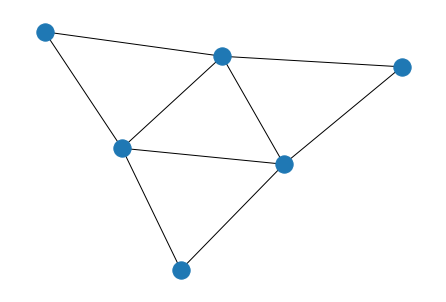

In [ ]:
G1 = nx.from_numpy_array(A1)
pos1 = nx.spring_layout(G1, seed=1)
nx.draw(G1, pos=pos1)

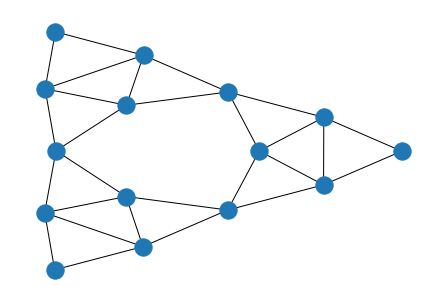

In [ ]:
G2 = nx.from_numpy_array(A2)
nx.draw_kamada_kawai(G2)

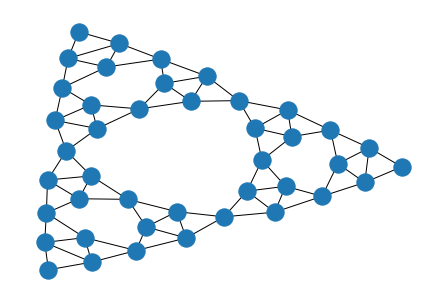

In [ ]:
G3 = nx.from_numpy_array(A3)
nx.draw_kamada_kawai(G3)

Now create the Energy and Gram matrices, $E$ and $G$. These matrices are used to solve the matrix equation $Ec=\lambda Gc$ for the vector $c$ which contains the coefficients for the Finite Element basis functions which are the piecewise harmonic splines. So the coefficients are the eigenvectors of the matrix $G^{-1}E$

The energy matrix will store the Dirichlet Energy (an inner product on $dom(E)$ modulo the constant functions) between the basis functions $\phi_i, \phi_j$ of the piecewise harmonic spline space $S(H_0, V_m)$. This space has dimension $\frac{3^{m+1}-3}{2}$ and the basis function $\phi_i$ is the dirac delta $\delta_{ij}$ at approximation level $m$ and is extended harmonically for levels $m'>m$. The Dirichlet Energy has the form: 

$$\varepsilon(\phi_i,\phi_j)=\lim_{m \rightarrow \infty}(\frac{5}{3})^m\sum_{x \sim_m y}(\phi_i(x)-\phi_i(y))(\phi_j(x)-\phi_j(y))$$

Note this is a rescaled limit of graph energies. These Dirichlet Energies are computed theoretically in [SU] for these basis functions. They are not hard to compute as the only nonzero terms in the sum are when the non-zero entry of $\phi_i$ and $\phi_j$ are adjacent or overlapping in the case where $i=j$. Furthermore, the elements of $S(H_0, V_m)$ have the property that $\varepsilon(u,v)=\varepsilon_m(u,v)$ so we do not have to evaluate a limit.

The Gram matrix will store the integral $\int \phi_i \phi_j d\mu$. These are computed theoretically in [SU]. These seem to be more difficult to compute and to approximate because extending harmonically by hand and bookkeeping the vertices is difficult without a good recursive algorithm.

In [ ]:
def compute_energy_matrix(A, m, n):
  # only basis functions for the non-boundary vertices
  A = np.array(A)
  D_norms = np.diag([4*((5/3)**m) for i in range(n-3)])
  A_inner_prod = -((5/3)**m)*A[3::, 3::]
  E = D_norms + A_inner_prod
  return E

def compute_gram_matrix(A, m, n):
  # only basis functions for the non-boundary vertices
  A = np.array(A)
  D_integral_sq = np.diag([(1/3**m)*(14/45) for i in range(n-3)])
  A_integral = (1/3**m)*(4/45)*A[3::, 3::]
  G = D_integral_sq + A_integral
  G_inv = np.linalg.inv(G)
  return G

E1 = compute_energy_matrix(A1, 1, n1)
Gr1 = compute_gram_matrix(A1, 1, n1)
Gr1_inv = np.linalg.inv(Gr1)
E2 = compute_energy_matrix(A2, 2, n2)
Gr2 = compute_gram_matrix(A2, 2, n2)
Gr2_inv = np.linalg.inv(Gr2)
E3 = compute_energy_matrix(A3, 3, n3)
Gr3 = compute_gram_matrix(A3, 3, n3)
Gr3_inv = np.linalg.inv(Gr3)

Find the eigenvalues and eigenvectors of $G^{-1}E$. Through the weak formulation of the differential equation $\Delta u = \lambda u$ and the projection onto a finite-dimenisional subspace these eigenvalues and eigenvectors will be approximate eigenvalues and eigenvectors of the fractal Laplcian $\Delta u$

In [ ]:
# find the eigenvalues and eigenvectors and sort
B1 = np.matmul(Gr1_inv, E1)
[w1, v1] = np.linalg.eigh(B1)
ind1 = np.argsort(w1)
w1 = w1[ind1]
v1 = v1[:, ind1]

B2 = np.matmul(Gr2_inv, E2)
[w2, v2] = np.linalg.eigh(B2)
ind2 = np.argsort(w2)
w2 = w2[ind2]
v2 = v2[:, ind2]

B3 = np.matmul(Gr3_inv, E3)
[w3, v3] = np.linalg.eigh(B3)
ind3 = np.argsort(w3)
w3 = w3[ind3]
v3 = v3[:, ind3]

Visualize the first few eigenvectors for each approximation $m=1,2,3$

In [ ]:
def visualize_eig(G, eigv, title, vid, angle=20):
  if len(eigv) == 3:
    seed = 2
  else:
    seed = 1
  pos = nx.spring_layout(G, dim=3, seed=seed)
  # Extract node and edge positions from the layout
  node_xyz = np.array([pos[v] for v in G])
  edge_xyz = np.array([(pos[u], pos[v]) for u, v in G.edges()])

  for i in range(len(node_xyz)):
    if i > 2:
      node_xyz[i, 2] = eigv[i-3]
    else:
      node_xyz[i, 2] = 0

  for i, edge in enumerate(edge_xyz):
    edge1 = edge[0]
    edge2 = edge[1]
    for node in node_xyz:
      if node[0] == edge1[0] and node[1] == edge1[1]:
        edge1[2] = node[2]
      elif node[0] == edge2[0] and node[1] == edge2[1]:
        edge2[2] = node[2]

  # Create the 3D figure
  fig = plt.figure(figsize=(10,7))
  ax = fig.add_subplot(111, projection="3d")

  heights = []
  for i in range(len(node_xyz)):
    heights.append(node_xyz[i, 2])

  # Plot the nodes - alpha is scaled by "depth" automatically
  p = ax.scatter(*node_xyz.T, s=100, ec="w", c=heights, cmap=cm.coolwarm)

  # Plot the edges
  for vizedge in edge_xyz:
      ax.plot(*vizedge.T, color="tab:gray")

  def _format_axes(ax):
      """Visualization options for the 3D axes."""
      # Suppress tick labels
      for dim in (ax.xaxis, ax.yaxis, ax.zaxis):
          dim.set_ticks([])
      # Set axes labels
      ax.set_zlabel("z")
      ax.set_ylabel("y")
      ax.set_xlabel("x")

  _format_axes(ax)
  fig.tight_layout()
  fig.colorbar(p)
  ax.set_title(title)
  ax.view_init(30, angle)

  if vid:
    def animate(frame):
      ax.view_init(30, (frame+30)/4)
      ax.set_title(title)
      plt.pause(.001)
      return fig

    anim = animation.FuncAnimation(fig, animate, frames=200, interval=50)
    return HTML(anim.to_html5_video())
  else:
    return None

In [ ]:
v01, v11, v21 = v1[:, 0], v1[:, 1], v1[:, 2]
v02, v12, v22 = v2[:, 0], v2[:, 1], v2[:, 2]
v03, v13, v23 = v3[:, 0], v3[:, 1], v3[:, 2]

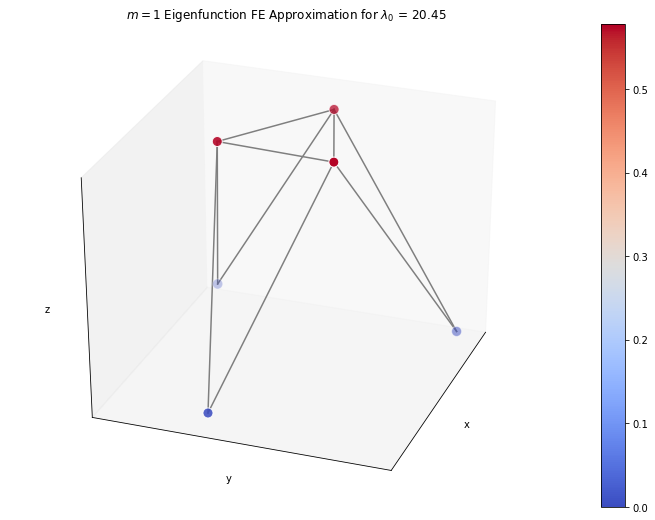

In [ ]:
title1 = '$m=1$ Eigenfunction FE Approximation for $\lambda_0$ = ' + str(np.round(w1[0], 2))
visualize_eig(G1, v01, title1, False)

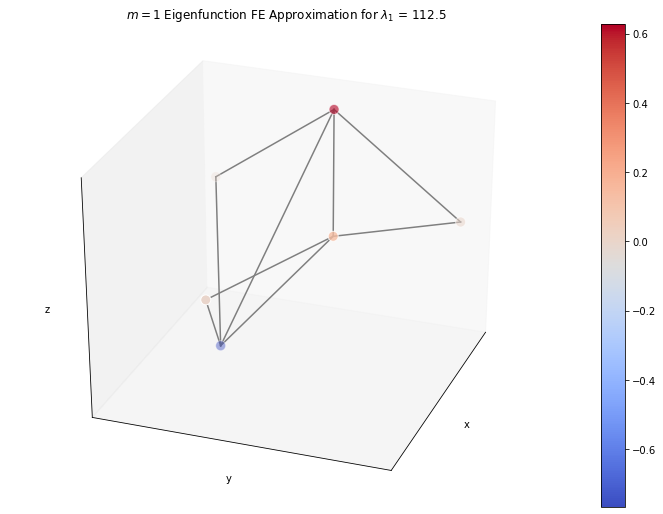

In [ ]:
title1 = '$m=1$ Eigenfunction FE Approximation for $\lambda_1$ = ' + str(np.round(w1[2], 2))
visualize_eig(G1, v21, title1, False, angle=20)

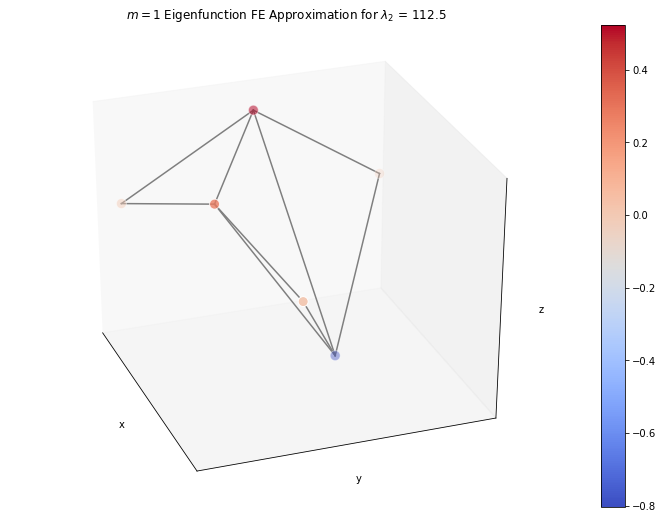

In [ ]:
title1 = '$m=1$ Eigenfunction FE Approximation for $\lambda_2$ = ' + str(np.round(w1[1], 2))
visualize_eig(G1, -v11, title1, False, angle=340)

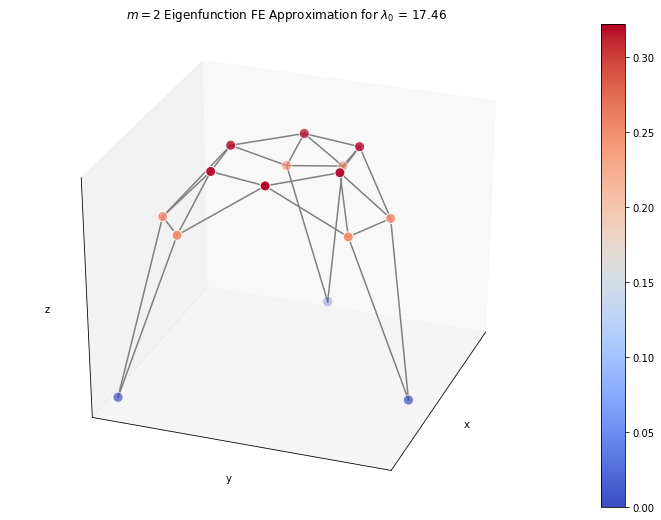

In [ ]:
title2 = '$m=2$ Eigenfunction FE Approximation for $\lambda_0$ = ' + str(np.round(w2[0], 2))
visualize_eig(G2, v02, title2, False)

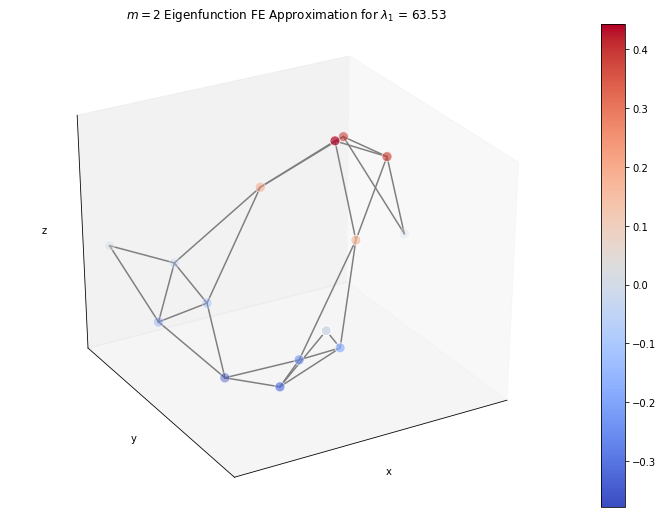

In [ ]:
title2 = '$m=2$ Eigenfunction FE Approximation for $\lambda_1$ = ' + str(np.round(w2[2], 2))
visualize_eig(G2, -v22, title2, False, angle=60)

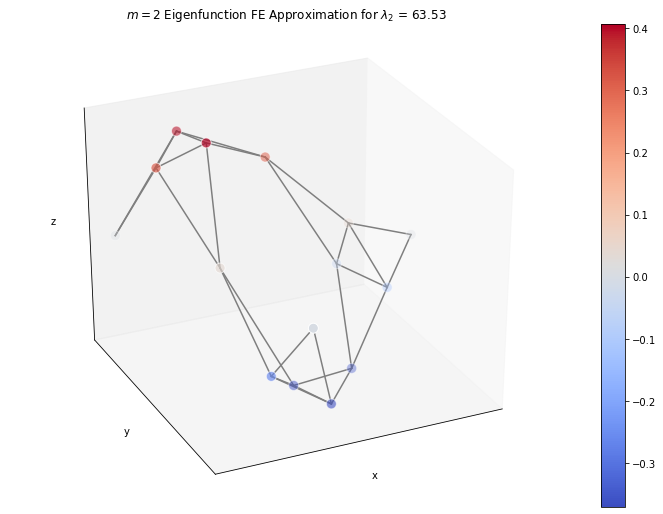

In [ ]:
title2 = '$m=2$ Eigenfunction FE Approximation for $\lambda_2$ = ' + str(np.round(w2[1], 2))
visualize_eig(G2, -v12, title2, False, angle=65)

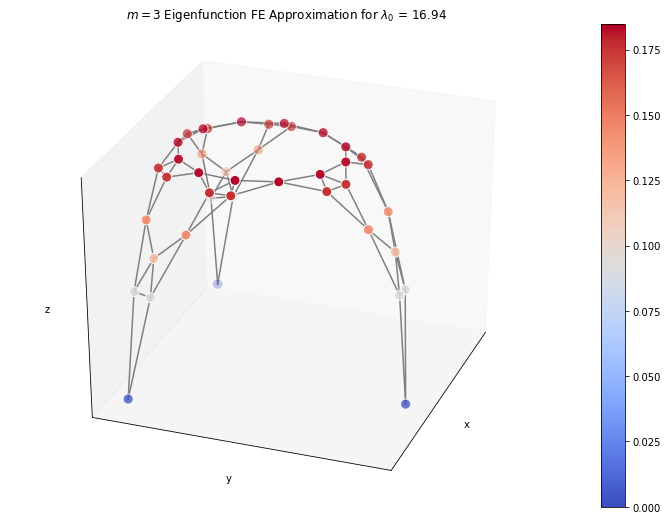

In [ ]:
title3 = '$m=3$ Eigenfunction FE Approximation for $\lambda_0$ = ' + str(np.round(w3[0], 2))
visualize_eig(G3, v03, title3, False)

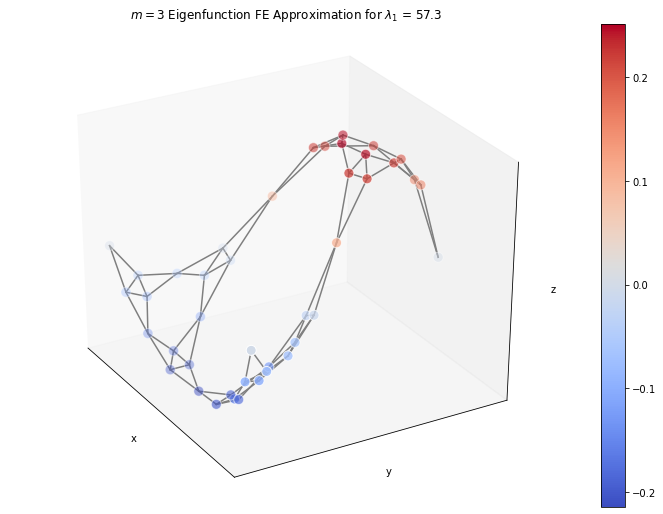

In [ ]:
title3 = '$m=3$ Eigenfunction FE Approximation for $\lambda_1$ = ' + str(np.round(w3[1], 2))
visualize_eig(G3, v13, title3, False, angle=-30)

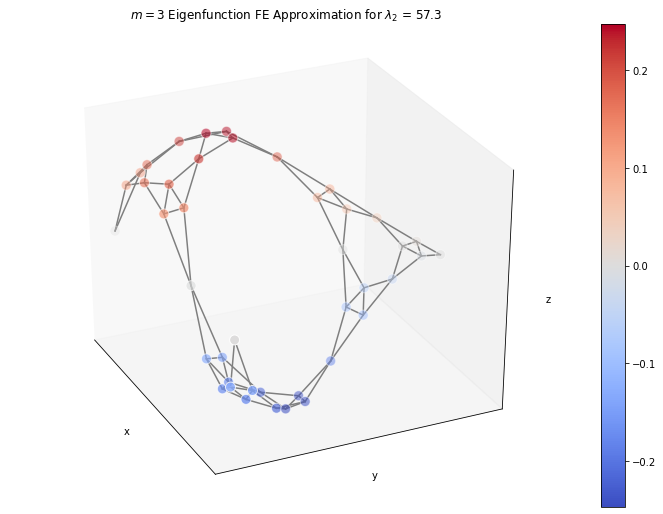

In [ ]:
title3 = '$m=3$ Eigenfunction FE Approximation for $\lambda_2$ = ' + str(np.round(w3[2], 2))
visualize_eig(G3, v23, title3, False, angle=-25)